In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, roc_auc_score, roc_curve,average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import TreebankWordTokenizer
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [4]:
data_url = pd.read_csv("example.csv")

In [5]:
data_url.head(3)

,url,label,Words,rawfeatures,features
0,http://br-ofertasimperdiveis.epizy.com/produto...,1,"['http', 'br', 'ofertasimperdiveis', 'epizy', ...","(6977,[0,1,2,3,19,29,186,207,210,243,349,580,1...","(6977,[0,1,2,3,19,29,186,207,210,243,349,580,1..."
1,https://semana-da-oferta.com/produtos.php?id=5...,1,"['https', 'semana', 'da', 'oferta', 'com', 'pr...","(6977,[0,3,6,19,2399,2463,3389],[1.0,1.0,1.0,1...","(6977,[0,3,6,19,2399,2463,3389],[0.54933083727..."
2,https://scrid-apps-creacust-sslhide90766752024...,1,"['https', 'scrid', 'apps', 'creacust', 'sslhid...","(6977,[0,6,838],[1.0,1.0,1.0])","(6977,[0,6,838],[0.5493308372727405,2.82128112..."


In [6]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)   
   
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=16)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [7]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print ("False Positive rate: ",false_positive_rate)
    print ("True Positive rate: ",true_positive_rate)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    #plt.title('Receiver Operating Characteristic')
    plt.style.use('bmh')
    plt.figure(figsize = (8, 8))
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right',fontsize=16)
    plt.plot([0,1],[0,1],'r--')
    #plt.xlim([-0.1,1.2])
    #plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate',size = 14)
    plt.xlabel('False Positive Rate',size = 14)
    plt.title('Receiver Operating Characteristic Curve, AUC = %0.4f' % roc_auc, size = 16)
    plt.show()

In [8]:
dataset = data_url.loc[:,['features','label']] 

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(dataset['features'].values)
X = tokenizer.texts_to_sequences(dataset['features'].values)
X = pad_sequences(X)
Y = dataset['label'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 40)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
print(Y)
print(dataset.info())

(88372, 160) (88372,)
(22093, 160) (22093,)
[1 1 1 ... 0 0 0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110465 entries, 0 to 110464
Data columns (total 2 columns):
features    110465 non-null object
label       110465 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ MB
None


In [100]:
#Using CNN

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from utils2 import KMaxPooling
from utils2 import Folding
from keras.layers import Dense, Input, Flatten, BatchNormalization


max_features = 3000
embed_dim = 50

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1])) 
model.add(Dense(units=24, input_dim=2, activation='relu')) #input_dim=2 means that your data have 2 features which will be used to determine final result
#model.add(Dropout(0.2))
#model.add(Dense(2, activation='relu'))
#model.add(AveragePooling1D(pool_size=2))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
#model.add(AveragePooling1D(pool_size=2))
model.add(KMaxPooling(k=4, axis=1))
model.add(Conv1D(filters=32, kernel_size=4, activation='relu'))
#model.add(Conv1D(128, 2, activation='relu '))
#model.add(Conv1D(128, 2, activation='relu'))
model.add(Flatten())
 
model.add(Dense(units=2,activation='softmax')) #10 (units) neurons are 10 'places' where network is able to store multiplications results between neuron weights and input data
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='sgd',metrics = ['accuracy'])
#model.compile(loss = 'mean_squared_error', optimizer='Adagrad',metrics = ['accuracy'])
#sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='binary_crossentropy', optimizer=sgd, metrics = ['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 160, 50)           150000    
_________________________________________________________________
dense_16 (Dense)             (None, 160, 24)           1224      
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 160, 64)           6208      
_________________________________________________________________
k_max_pooling_1 (KMaxPooling (None, 4, 64)             0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 1, 32)             8224      
_________________________________________________________________
flatten_8 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 66        
Total para

In [101]:
batch_size = 2000
epoch = 40

history = model.fit(X_train, Y_train, epochs = epoch, batch_size=batch_size, shuffle=True, validation_data=(X_test, Y_test), validation_split=0.30)
y_pred = model.predict_classes(X_test, batch_size=batch_size)
p = model.predict_proba(X_test)  # to predict probability



Train on 88372 samples, validate on 22093 samples
Epoch 1/40
88372/88372 [==============================] - 34s 386us/step - loss: 0.6878 - acc: 0.6313 - val_loss: 0.6836 - val_acc: 0.7603
Epoch 2/40
88372/88372 [==============================] - 32s 360us/step - loss: 0.6798 - acc: 0.7587 - val_loss: 0.6759 - val_acc: 0.7665
Epoch 3/40
88372/88372 [==============================] - 33s 376us/step - loss: 0.6727 - acc: 0.7611 - val_loss: 0.6692 - val_acc: 0.7641
Epoch 4/40
88372/88372 [==============================] - 32s 360us/step - loss: 0.6653 - acc: 0.7572 - val_loss: 0.6610 - val_acc: 0.7777
Epoch 5/40
88372/88372 [==============================] - 32s 357us/step - loss: 0.6562 - acc: 0.8091 - val_loss: 0.6507 - val_acc: 0.8328
Epoch 6/40
88372/88372 [==============================] - 32s 358us/step - loss: 0.6446 - acc: 0.8448 - val_loss: 0.6375 - val_acc: 0.8656
Epoch 7/40
88372/88372 [==============================] - 32s 358us/step - loss: 0.6294 - acc: 0.8697 - val_loss: 0.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


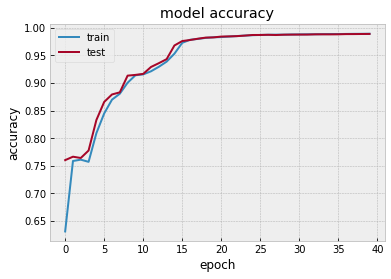

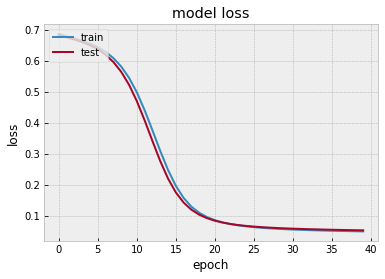

In [102]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plt.savefig('/Users/mac/Documents/DeepURL_2/Result/max_pool_acc_loss.eps', format='eps', dpi=500)
#plt.savefig('/Users/mac/Documents/DeepURL_2/Result/max_pool_acc_loss.pdf', format='pdf', dpi=500)



<Figure size 432x288 with 0 Axes>

Confusion matrix, without normalization
[[10664    19]
 [  233 11177]]


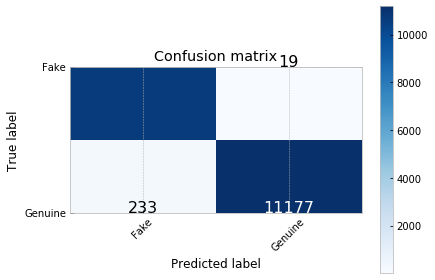

In [103]:
cm=confusion_matrix(Y_test, y_pred)
print('Confusion matrix, without normalization')
print(cm)
plot_confusion_matrix(cm)


              precision    recall  f1-score   support

   Malicious       0.98      1.00      0.99     10683
      Normal       1.00      0.98      0.99     11410

    accuracy                           0.99     22093
   macro avg       0.99      0.99      0.99     22093
weighted avg       0.99      0.99      0.99     22093

False Positive rate:  [0. 0. 1.]
True Positive rate:  [0.   0.98 1.  ]


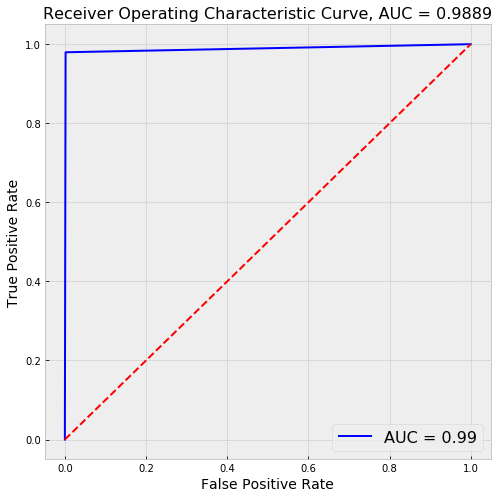

In [104]:
print(classification_report(Y_test, y_pred, target_names=['Malicious','Normal']))
cnn_roc = plot_roc_curve(Y_test, y_pred)